In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("CC_Data_2020.csv")

In [4]:
df.head()

,Time,VisitorID,ExternalID,Users,Accommodation,LinkTitle,LinkType,ContentInfo
0,10/30/20 13:16,9EDD833D-9D6B-46AC-A85E-DF21425162C4,8846.0,User,Night Support Service,Youtube Music,Internet,NaN
1,10/30/20 13:14,9EDD833D-9D6B-46AC-A85E-DF21425162C4,8846.0,User,Night Support Service,Youtube Music,Internet,NaN
2,10/30/20 13:14,9EDD833D-9D6B-46AC-A85E-DF21425162C4,8846.0,User,Night Support Service,My Music,Category,NaN
3,10/30/20 13:14,9EDD833D-9D6B-46AC-A85E-DF21425162C4,8846.0,User,Night Support Service,Entertainment,Category,NaN
4,10/30/20 13:01,679CBA7A-948B-4F2E-9432-002DDD5FFF8A,NaN,User,Broom Main Building,Forth 2,Radio,NaN


In [5]:
df.columns

Index(['Time', 'VisitorID', 'ExternalID', 'Users', 'Accommodation',
       'LinkTitle', 'LinkType', 'ContentInfo'],
      dtype='object')

In [6]:
df.shape

(314766, 8)

### Data cleaning

In [9]:
df1 = df.drop(columns=['VisitorID', 'Users', 'Accommodation', 'ContentInfo']).applymap(str)
df1

,Time,ExternalID,LinkTitle,LinkType
0,10/30/20 13:16,8846.0,Youtube Music,Internet
1,10/30/20 13:14,8846.0,Youtube Music,Internet
2,10/30/20 13:14,8846.0,My Music,Category
3,10/30/20 13:14,8846.0,Entertainment,Category
4,10/30/20 13:01,nan,Forth 2,Radio
...,...,...,...,...
314761,10/29/18 1:27,5107.0,Red Hot Chili Peppers,Internet
314762,10/29/18 1:27,5107.0,My Music,Category
314763,10/29/18 1:27,5107.0,Entertainment,Category
314764,10/29/18 0:59,8639.0,My Music,Category


In [16]:
df_clean = df1[~df1.ExternalID.str.contains("nan")]
df_clean

,Time,ExternalID,LinkTitle,LinkType
0,10/30/20 13:16,8846.0,Youtube Music,Internet
1,10/30/20 13:14,8846.0,Youtube Music,Internet
2,10/30/20 13:14,8846.0,My Music,Category
3,10/30/20 13:14,8846.0,Entertainment,Category
6,10/30/20 12:59,7933.0,Frank Sinatra,Internet
...,...,...,...,...
314761,10/29/18 1:27,5107.0,Red Hot Chili Peppers,Internet
314762,10/29/18 1:27,5107.0,My Music,Category
314763,10/29/18 1:27,5107.0,Entertainment,Category
314764,10/29/18 0:59,8639.0,My Music,Category


### Most popular activities in general

In [24]:
df_pa = df_clean.groupby(['LinkTitle']).count().sort_values(by='Time', ascending=False).head(20)
df_pa

,Time,ExternalID,LinkType
LinkTitle,,,
Entertainment,32781,32781,32781
Card Matching Games,12414,12414,12414
My Music,12256,12256,12256
My Interests,11181,11181,11181
YouTube,10065,10065,10065
Google,9914,9914,9914
Play Games,9317,9317,9317
Patience,7622,7622,7622
Single Player Games,7007,7007,7007


In [41]:
df2 = df1.reset_index()
df2

,index,Time,ExternalID,LinkTitle,LinkType
0,0,10/30/20 13:16,8846.0,Youtube Music,Internet
1,1,10/30/20 13:14,8846.0,Youtube Music,Internet
2,2,10/30/20 13:14,8846.0,My Music,Category
3,3,10/30/20 13:14,8846.0,Entertainment,Category
4,4,10/30/20 13:01,nan,Forth 2,Radio
...,...,...,...,...,...
314761,314761,10/29/18 1:27,5107.0,Red Hot Chili Peppers,Internet
314762,314762,10/29/18 1:27,5107.0,My Music,Category
314763,314763,10/29/18 1:27,5107.0,Entertainment,Category
314764,314764,10/29/18 0:59,8639.0,My Music,Category


In [34]:
#df3 = df1.T
#df3

In [35]:
value_list = ['Entertainment', 'Card Matching Games', 'YouTube', 'My Music', 'My Interests',
             'Google', 'Patience', 'Play Games', 'Videos', 'Online Tv',
             'Information', 'Youtube', 'Radio Stations', 'Single Player Games', 'Family & Friends',
             'Smooth Radio', 'Yahoo Mail', 'Test Cards', 'Youtube Music', 'Candy Crush Saga']
df_t20 = df_clean[df_clean.LinkTitle.isin(value_list)]
df_t20

,Time,ExternalID,LinkTitle,LinkType
0,10/30/20 13:16,8846.0,Youtube Music,Internet
1,10/30/20 13:14,8846.0,Youtube Music,Internet
2,10/30/20 13:14,8846.0,My Music,Category
3,10/30/20 13:14,8846.0,Entertainment,Category
10,10/30/20 12:57,7933.0,My Music,Category
...,...,...,...,...
314760,10/29/18 2:49,5385.0,My Interests,Category
314762,10/29/18 1:27,5107.0,My Music,Category
314763,10/29/18 1:27,5107.0,Entertainment,Category
314764,10/29/18 0:59,8639.0,My Music,Category


In [37]:
#corrMatrix = df2.corr(method='pearson')
#corrMatrix

In [77]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Build a dataframe with your connections
#df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
#df

In [37]:
# Build your graph
G = nx.from_pandas_edgelist(df_t20, 'LinkTitle', 'LinkTitle')

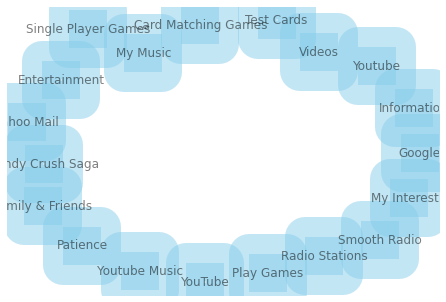

In [38]:
# Graph with Custom nodes:
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)
plt.show()